Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2936 - loss: 2.0668 - val_accuracy: 0.7333 - val_loss: 1.8157
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8378 - loss: 1.7243 - val_accuracy: 0.8333 - val_loss: 1.5313
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8033 - loss: 1.5105 - val_accuracy: 0.8667 - val_loss: 1.3111
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8487 - loss: 1.3025 - val_accuracy: 0.8667 - val_loss: 1.1525
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8737 - loss: 1.1595 - val_accuracy: 0.9000 - val_loss: 1.0442
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8244 - loss: 1.0634 - val_accuracy: 0.9000 - val_loss: 0.9573
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8684 - loss: 0.9545 - val_accuracy: 0.9000 - val_loss: 0.8805
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8520 - loss: 0.9474 - val_accuracy: 0.9000 - val_loss

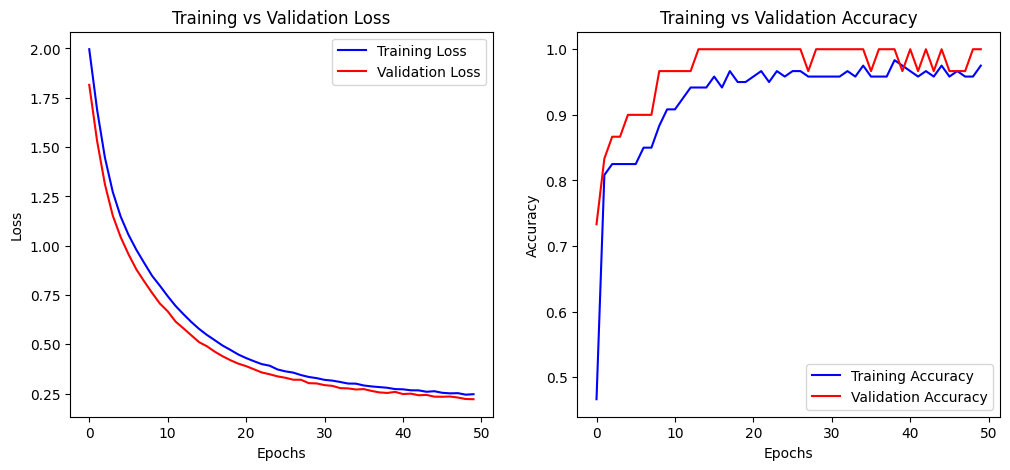

Test Accuracy: 100.00%


In [1]:
#3A
''' 
Aim: Implement L1 and L2 norm penalties for regularization.

L1 L2 regularization techniques are commonly used to prevent overfitting in ML
Regularization adds a penalty term to the loss function based on 
the magnitudes of the model parameters (weights).

L1 (Lasso):
L1 penalty is the sum of absolute values of parameters.
It encourages sparsity in the model, forcing some weights to become exactly zero,
which can be interpreted as feature selection.
Sparsity refers to thinly distributed.

L2 (Ridge):
The L2 penalty is the sum of the squared values of the model parameters.
It encourages small weights but does not set them to zero, making it useful for
improving model generalization without eliminating features.

Elastic Net combines both L1 and L2 penalties, allowing for both sparsity and
weight shrinkage. It adds both the penalties.

Steps to create a model
1. Load dataset
2. Partition into X and y (Dependent and independent)
3. Encode if needed
4. Scaled the dataset
5. Split dataset into train and test
6. Define the neural network model using a sequential architecture
7. Compile the model by specifying optimizer, loss function, and evaluation metric
8. Train the model and store training history for later visualization
9. Plot the training and validation loss & accuracy over epochs. Loss curve and Accuracy curve
10. Evaluate model on test data to check final performance and Print test accuracy percentage
'''

# Import necessary libraries
import tensorflow as tf # TensorFlow for deep learning
from tensorflow.keras import layers, regularizers # Layers and regularizers for building the neural network
from sklearn.datasets import load_iris # Load the Iris dataset
from sklearn.model_selection import train_test_split # Split dataset into training and testing sets
from sklearn.preprocessing import OneHotEncoder, StandardScaler # Preprocessing utilities
import numpy as np # For numerical operations
import matplotlib.pyplot as plt # For visualization of training progress


# Load the Iris dataset (contains 150 samples with 4 features each)
iris = load_iris()

X = iris.data # Extract feature matrix (4 features: sepal length, sepal width, petal length, petal width)
y = iris.target.reshape(-1, 1) # Extract target labels and reshape to column vector

# One-hot encode the target labels (convert categorical labels to binary vectors)
encoder = OneHotEncoder(sparse_output=False) # Prevent deprecation warning by using sparse_output=False
y = encoder.fit_transform(y) # Convert labels to one-hot encoding (3 classes → [1,0,0], [0,1,0], [0,0,1])

# Standardize the feature values (zero mean, unit variance) to improve model performance
scaler = StandardScaler() # Initialize the StandardScaler
X = scaler.fit_transform(X) # Apply standardization to feature values

# Split dataset into training (80%) and testing (20%) subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model using a sequential architecture
model = tf.keras.Sequential([ #Stacks the neural layers
    layers.Dense(64, activation='relu', # First fully connected hidden layer with 64 neurons and ReLU activation. 
    kernel_regularizer=regularizers.l1(0.01)), # L1 regularization to prevent overfitting

    layers.Dense(64, activation='relu', # Second fully connected hidden layer with 64 neurons and ReLU activation
    kernel_regularizer=regularizers.l2(0.01)), # L2 regularization for weight decay

    layers.Dense(3, activation='softmax') # Output layer with 3 neurons (one for each class) using softmax activation
    ])

# Compile the model by specifying optimizer, loss function, and evaluation metric
model.compile(optimizer='adam', # Adam optimizer for adaptive learning rate
    loss='categorical_crossentropy', # Cross-entropy loss for multi-class classification
    metrics=['accuracy']) # Track accuracy during training

# Train the model and store training history for later visualization
history = model.fit(
    X_train, y_train, # Training dataset (features and labels)
    epochs=50, # Train for 50 epochs (full dataset passes)
    batch_size=8, # Train in small batches of 8 samples
    validation_data=(X_test, y_test), # Use test data for validation after each epoch
    verbose=1 # Show progress output during training
    )

# Plot the training and validation loss & accuracy over epochs
plt.figure(figsize=(12, 5)) # Set figure size for better readability

# Plot Loss Curve
plt.subplot(1, 2, 1) # Create subplot for loss
plt.plot(history.history['loss'], label='Training Loss', color='blue') # Plot training loss
plt.plot(history.history['val_loss'], label='Validation Loss', color='red') # Plot validation loss
plt.xlabel('Epochs') # X-axis label
plt.ylabel('Loss') # Y-axis label
plt.title('Training vs Validation Loss') # Title of the plot
plt.legend() # Show legend to distinguish training vs validation loss

# Plot Accuracy Curve
plt.subplot(1, 2, 2) # Create subplot for accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue') # Plot training  accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red') # Plot validation accuracy
plt.xlabel('Epochs') # X-axis label
plt.ylabel('Accuracy') # Y-axis label
plt.title('Training vs Validation Accuracy') # Title of the plot
plt.legend() # Show legend for accuracy curves

plt.show() # Display the plots

# Evaluate model on test data to check final performance
loss, accuracy = model.evaluate(X_test, y_test, verbose=0) # Evaluate the trained model on test set
print(f"Test Accuracy: {accuracy * 100:.2f}%") # Print test accuracy percentage

c:\Users\Artophilic\anaconda3\envs\practvenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8287 - loss: 0.5351 - val_accuracy: 0.9580 - val_loss: 0.1292
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9429 - loss: 0.1882 - val_accuracy: 0.9696 - val_loss: 0.1011
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9574 - loss: 0.1433 - val_accuracy: 0.9707 - val_loss: 0.0914
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9603 - loss: 0.1320 - val_accuracy: 0.9756 - val_loss: 0.0781
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9629 - loss: 0.1211 - val_accuracy: 0.9782 - val_loss: 0.0777
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9692 - loss: 0.1040 - val_accuracy: 0.9762 - val_loss: 0.0780
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9718 - loss: 0.0995 - val_accuracy: 0.9779 - val_loss: 0.0754
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9721 - loss: 0

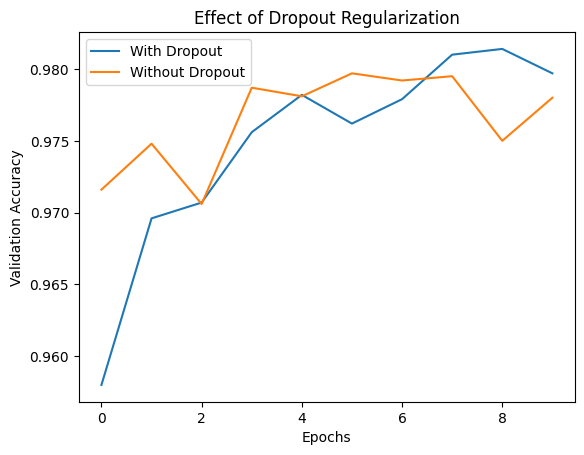

In [2]:
#3b
''' 
Aim: Write a python program to Implement dropout regularization and
evaluate its effectiveness for deep learning

Dropout regularization: It is a technique used in neural networks to prevent the
overfitting by randomly dropping or deactivating a fraction of neurons during training.
This forces the network to learn more robust features by reducing reliance on specific
neurons.

During training, neurons are randomly turned off (set to zero) with a certain probability
(dropout rate, typically between 0.2 and 0.5). The dropout is applied to both the input and hidden 
layers but not the output layer.
'''

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset (handwritten digits 0-9)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the data (scale pixel values to range 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the model with dropout to prevent overfitting
model_with_dropout = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)), # Flatten input images (28x28) into a 1D array
    layers.Dense(512, activation='relu'), # First fully connected layer with 512 neurons and ReLU activation
    layers.Dropout(0.5), # Dropout layer with 50% dropout rate to reduce overfitting
    layers.Dense(256, activation='relu'), # Second fully connected layer with 256 neurons
    layers.Dropout(0.5), # Another dropout layer
    layers.Dense(10, activation='softmax') # Output layer with 10 neurons (one for each digit class)
    ])

# Compile the model (use Adam optimizer and sparse categorical cross-entropy loss)
model_with_dropout.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', #data is categorical in nature
    metrics=['accuracy'])

# Train the model with dropout for 10 epochs
history_with_dropout = model_with_dropout.fit(x_train, y_train, epochs=10,
validation_data=(x_test, y_test))


# Define the model without dropout (for comparison)
model_without_dropout = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)), # Flatten input images
    layers.Dense(512, activation='relu'), # First dense layer
    layers.Dense(256, activation='relu'), # Second dense layer
    layers.Dense(10, activation='softmax') # Output layer with 10 neurons
])

# Compile the model (same settings as before)
model_without_dropout.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# Train the model without dropout for 10 epochs
history_without_dropout = model_without_dropout.fit(x_train, y_train, epochs=10,
validation_data=(x_test, y_test))

# Plot the validation accuracy for both models to compare performance
plt.plot(history_with_dropout.history['val_accuracy'], label='With Dropout')
plt.plot(history_without_dropout.history['val_accuracy'], label='Without Dropout')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Effect of Dropout Regularization')
plt.show()

Epoch 1, Accuracy: 0.9907
Epoch 2, Accuracy: 0.9907
Epoch 3, Accuracy: 0.9907
Epoch 4, Accuracy: 0.9907
Early stopping triggered!
Final Accuracy: 0.9907


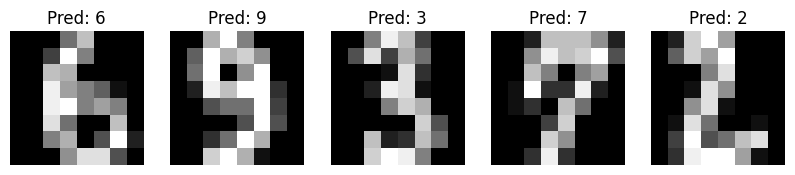

In [ ]:
#3c
''' 
Aim: Explore semi-supervised learning techniques and implement early
stopping.

Semi-supervised learning: Semi-supervised learning uses both labeled and unlabeled data to train
models, typically with a small portion of labeled data and a large amount of unlabeled
data.

There are 3 techniques:
1. Self-training where model iteratively labels unlabeled data and uses it as a pseudo label train the model
2. Co-training: Multiple classifiers are trained on different views of the data, and
their predictions are used to label unlabeled data.
3. Graph-based methods: Unlabeled data points are connected to labeled points
using graph structures, transferring labels across the graph.

Early stopping is a regularization technique where we stop the training process when
the model's performace on the validation set starts to deteriorate and prevent overfitting.
For early stopping, we need to monitor the validation loss during training and if it stops improving for a 
set of number of epochs, training halts to avoid ovefitting.
'''
#semi-supervised learning using Label Spreading with early stopping.
import numpy as np #For numerical operations
import matplotlib.pyplot as plt #For plotting images
from sklearn.datasets import load_digits #To load hand written digits
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelSpreading #A semi-supervised learning algo
from sklearn.metrics import accuracy_score

def early_stopping(prev_acc, curr_acc, patience, count):
    ''' If accuracy doesn't improve for patience epochs, stop training early.'''
    if curr_acc <= prev_acc:
        #If current accuracy <= previous accuracy, increment count
        count += 1 #Count tracks how many times no improvement happened.
    else:
        count = 0
    return count >= patience, count #If count reaches patience, we signal to stop.

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Create a semi-supervised scenario by randomly removing labels
rng = np.random.RandomState(42)
unlabeled_mask = rng.rand(len(y)) < 0.7 # 70% labels removed
y_semi = np.copy(y)
y_semi[unlabeled_mask] = -1 # Mark as unlabeled

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Label Spreading model
label_spread = LabelSpreading(kernel='knn', n_neighbors=7, alpha=0.2)
#knn: K-nearest neighbors to spread labels.
#alpha=0.2: blending factor between original and propagated labels.
label_spread.fit(X_train, y_train)

# Implement early stopping
patience = 3 #3 chances before stopping
prev_acc = 0.0
count = 0

for epoch in range(10): # Max iterations
    label_spread.fit(X_train, y_train) #Training on X_train
    y_pred = label_spread.predict(X_test) #Predict on X_test
    curr_acc = accuracy_score(y_test, y_pred)
    print(f"Epoch {epoch + 1}, Accuracy: {curr_acc:.4f}")
    stop, count = early_stopping(prev_acc, curr_acc, patience, count)
    if stop:
        print("Early stopping triggered!")
        break
    prev_acc = curr_acc

# Final accuracy
y_final_pred = label_spread.predict(X_test)
final_acc = accuracy_score(y_test, y_final_pred)
print(f"Final Accuracy: {final_acc:.4f}")


# Plot some labeled vs predicted results
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Pred: {y_final_pred[i]}")
    ax.axis('off')
plt.show()


''' 
Load Dataset: Handwritten digits (0-9)
Create Unlabeled Data: 70% of training labels are hidden
Initialize Model: LabelSpreading using k-NN
Early Stopping: Stop training if no accuracy improvement for 3 times
Train & Evaluate: Loop over epochs, measure accuracy
Visualize: Show a few sample test digits with predicted labels
'''


c:\Users\Artophilic\anaconda3\envs\practvenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Artophilic\anaconda3\envs\practvenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.8410 - loss: 0.4967 - val_accuracy: 0.9860 - val_loss: 0.0403
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9719 - loss: 0.0944 - val_accuracy: 0.9886 - val_loss: 0.0350
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9783 - loss: 0.0674 - val_accuracy: 0.9872 - val_loss: 0.0422
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9833 - loss: 0.0538 - val_accuracy: 0.9884 - val_loss: 0.0389
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9847 - loss: 0.0470 - val_accuracy: 0.9901 - val_loss: 0.0283
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9269 - loss: 0.2143
Accuracy on Noisy Data: 0.9374


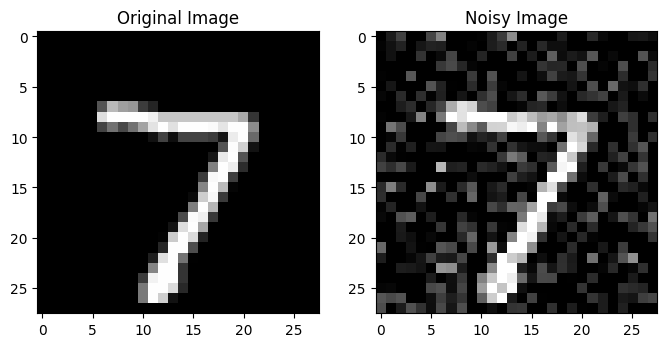

In [ ]:
#3d:
''' 
Aim: Explore techniques for dataset augmentation and noise robustness.

Dataset augmentation: A technique to artificially increase the size of a training dataset by
creating modified versions of existing data.

Techniques :
■ Image Augmentation: Rotation, flipping, cropping, scaling, and color
adjustments (e.g., using libraries like TensorFlow or Keras).
■ Text Augmentation: Synonym replacement, random insertion, deletion,
or swapping of words to generate varied sentence structures.
■ Audio Augmentation: Speed variation, pitch shifting, adding noise, or
changing volume.

Noise robustness: Techniques that make models more resilient to noisy or corrupted
data, improving performance in real-world applications.
techniques:
■ Data Augmentation: Adding noise or distortions to the dataset during
training to improve robustness.
■ Regularization: Dropout, L2 regularization, or early stopping to prevent
overfitting to noisy data.
■ Noise Injection: Adding random noise to inputs or weights to force the
model to learn more generalized features.
'''

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the MNIST dataset (handwritten digits)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Expand dimensions to match CNN input shape (28, 28, 1)
''' 
MNIST images are (28, 28) but CNN expects (28, 28, 1) (height, width, channels).
For Grayscale, the channel = 1'''
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Define Data Augmentation techniques
aug_datagen = ImageDataGenerator(
    rotation_range=10, # Rotate images by up to 10 degrees
    width_shift_range=0.1, # Shift images horizontally by 10%
    height_shift_range=0.1, # Shift images vertically by 10%
    zoom_range=0.1, # Zoom in/out by 10%
    shear_range=0.1 # Apply shearing transformations
    )

def add_noise(images, noise_factor=0.2):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.) # Ensure values stay in [0,1] range
    return noisy_images


# Create noisy training and testing datasets
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

# Build a Convolutional Neural Network (CNN) model
model = Sequential([ #Add layers one after another.
    #32 filters, 3x3 size
    Conv2D(32, (3, 3) , activation='relu', input_shape=(28, 28, 1)), # First convolutional layer
    #MaxPooling2D: Reduce image size downsampling
    MaxPooling2D((2, 2)), # Reduce spatial dimensions
    #64 filters, 3x3 size
    Conv2D(64, (3, 3), activation='relu'), # Second convolutional layer
    #Further reducing the size
    MaxPooling2D((2, 2)), # Reduce spatial dimensions further
    Flatten(), # Flatten the feature maps into a 1D vector
    Dense(128, activation='relu'), # Fully connected layer with 128 neurons
    Dense(10, activation='softmax') # Output layer with 10 neurons (one per class)
    #Softmax: Probablility distribution
    ])

# Compile the model with Adam optimizer and categorical cross-entropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using augmented data
model.fit(aug_datagen.flow(x_train, y_train, batch_size=32), epochs=5,
validation_data=(x_test, y_test))

# Evaluate model performance on noisy test images
test_loss, test_acc = model.evaluate(x_test_noisy, y_test)
print(f'Accuracy on Noisy Data: {test_acc:.4f}')

# Display an example of an original image vs a noisy image
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(x_test[0].squeeze(), cmap='gray') # Show original image
axes[0].set_title("Original Image")
axes[1].imshow(x_test_noisy[0].squeeze(), cmap='gray') # Show noisy image
axes[1].set_title("Noisy Image")
plt.show()